In [1]:
# Downloading data base from kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c birdclef-2022

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 6.12G/6.12G [02:16<00:00, 79.0MB/s]
100% 6.12G/6.12G [02:16<00:00, 48.3MB/s]


In [2]:
# Downloadind libraries
! pip install scikit-maad
! sudo apt-get install python-pyaudio python3-pyaudio
! pip install Ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 4.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libportaudio2
Suggested packages:
  python-pyaudio-doc
The following N

In [1]:
# Libraries
import os
import zipfile as zp
import pickle
import json
import numpy as np
import math

import librosa
import librosa.display
from maad import sound
from maad import util

import matplotlib.pyplot as plt
from google.colab import drive

In [4]:
# Para facilitar el ejercicio, descomprimimos los archivos
with zp.ZipFile('/content/birdclef-2022.zip', 'r') as zipObj:
   # Extraemos todos los archivos dentro del ambiente de trabajo de google colab
   zipObj.extractall('temp')
   print('File is unzipped in temp folder') 

File is unzipped in temp folder


In [8]:
# Es necesario guardar todas la imágenes en un objeto
dataset_path = '/content/temp/train_audio'

# Sólo los que estamos interesados
scored_spp = open('/content/temp/scored_birds.json')
scored_spp = json.load(scored_spp)


# Cantidad de número de muestras por ventana
n_fft = 2040
# la cantidad de muestras que se cambian despues de cada FFT
hop_length = 512
# Datos recogidos en cada audio
sample_rate = 22050
duration = 11
sample_per_track = sample_rate * duration

# número de segmentos de cada track
num_segments = 3

num_sample_per_segment = int(sample_per_track / num_segments)
expected_num_mfcc_vectors_per_segment = math.ceil(
    num_sample_per_segment / hop_length)

# Creamos listas vacías
spp = []
label = []
mfcc = []

#Loop through all the birds sound
for (dirpath,dirnames,filenames) in os.walk(dataset_path):

  # ensure that were not at the root level
  
  if dirpath.split('/')[-1] in scored_spp:
      #save the semantic label
      print("\nProcessing {}".format(dirpath.split("/")[-1]))
      
      #process files for a specific sound
      if len(filenames) > 5:
        print('Too much files: processing only 5')

        try:
          for idx, f in enumerate(filenames): 
            if idx < 5:
              #load audio file
              print(f'Loading file number {idx}')
              file_path = os.path.join(dirpath, f)
              signal,sr = librosa.load(file_path, sr = sample_rate)
              
              # process of segments extracting mfcc and storing data 
              for s in range(num_segments):
                # print(f'------segment {s}')
                start_sample = num_sample_per_segment 
                finish_sample = start_sample + num_sample_per_segment
                
                mel = librosa.feature.melspectrogram(
                                          signal[start_sample:finish_sample],
                                          sr =sr,
                                          n_fft=n_fft,
                                          hop_length=hop_length)
                mel = mel.T

                            
                # Eliminación sonido de fondo
                rm_bk, noise_profile, _=sound.remove_background(mel)
                power_to_db = librosa.power_to_db(rm_bk, ref=np.max)
                
                #store mfcc for segment if it has the expected length
                if len(power_to_db) == expected_num_mfcc_vectors_per_segment:
                  spp.append(dirpath.split("/")[-1])
                  mfcc.append(power_to_db.tolist())

            continue
        except:
            pass


Processing yefcan
Too much files: processing only 5
Loading file number 0
Loading file number 1
Loading file number 2
Loading file number 3
Loading file number 4

Processing houfin
Too much files: processing only 5
Loading file number 0
Loading file number 1
Loading file number 2
Loading file number 3
Loading file number 4

Processing aniani
Too much files: processing only 5
Loading file number 0
Loading file number 1
Loading file number 2
Loading file number 3
Loading file number 4

Processing barpet
Too much files: processing only 5
Loading file number 0
Loading file number 1
Loading file number 2
Loading file number 3
Loading file number 4

Processing omao
Too much files: processing only 5
Loading file number 0
Loading file number 1
Loading file number 2
Loading file number 3
Loading file number 4

Processing maupar

Processing puaioh

Processing jabwar
Too much files: processing only 5
Loading file number 0
Loading file number 1
Loading file number 2

Processing iiwi
Too much file

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2040 is too small for input signal of length=0
  n_fft, y.shape[-1]


Loading file number 1
Loading file number 2
Loading file number 3
Loading file number 4

Processing hawhaw

Processing hawcre
Too much files: processing only 5
Loading file number 0
Loading file number 1
Loading file number 2
Loading file number 3
Loading file number 4

Processing hawama
Too much files: processing only 5
Loading file number 0
Loading file number 1

Processing elepai
Too much files: processing only 5
Loading file number 0
Loading file number 1
Loading file number 2
Loading file number 3
Loading file number 4

Processing ercfra
Too much files: processing only 5
Loading file number 0
Loading file number 1

Processing skylar
Too much files: processing only 5
Loading file number 0
Loading file number 1
Loading file number 2
Loading file number 3
Loading file number 4

Processing apapan
Too much files: processing only 5
Loading file number 0
Loading file number 1
Loading file number 2
Loading file number 3
Loading file number 4

Processing crehon

Processing akiapo
Too much 

In [3]:
# Guardamos todo en un objeto
data = {
  'spp': spp,
  'mfcc': mfcc#,
  # 'label': label
}

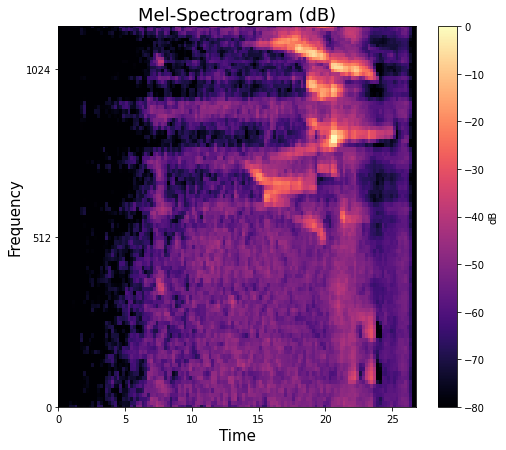

In [9]:
# Comprobamos que se haya cargado bien
plt.figure(figsize=(8, 7))
librosa.display.specshow(np.array(data['mfcc'][3]), sr=2450, x_axis='time', y_axis='mel', 
                         cmap='magma', hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)' , fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show();

In [11]:
print(len(data['mfcc']))
print(len(data['spp']))

370
370


In [12]:
# Lo guardamos en el google drive
drive.mount('/content/gdrive') # WARNING! Pedirá permisos

with open('/content/gdrive/MyDrive/Colab Notebooks/mfcc.pickle', 'wb') as file:
    pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
